<a href="https://colab.research.google.com/github/us/addons/blob/add-focalloss-tutorial/docs/tutorials/losses_focalloss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.



In [0]:
#@title Licensed under the Apache License, Version 2.0
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

 # TensorFlow Addons Losses: Sigmoid Focal Loss Entropy


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/addons/tutorials/optimizers_lazyadam"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/addons/blob/master/docs/tutorials/optimizers_lazyadam.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/addons/blob/master/docs/tutorials/optimizers_lazyadam.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/addons/docs/tutorials/optimizers_lazyadam.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Overview
This notebook will demonstrate how to use the *Sigmoid Focal Loss* function in TensorFlow Addons and compares with *Sparse Categorical Crossentropy Loss* function on **MNIST dataset**.

**Resources**:

- [Focal Loss for Dense Object Detection (Original Paper)](https://arxiv.org/abs/1708.02002)



## Focal Loss

Focal loss was first introduced in the [RetinaNet paper](https://arxiv.org/pdf/1708.02002.pdf). Focal loss is extremely useful for classification when you have highly imbalanced classes. It down-weights well-classified examples and focuses on hard examples. The loss value is much high for a sample which is misclassified by the classifier as compared to the loss value corresponding to a well-classified example. One of the best use-cases of focal loss is its usage in object detection where the imbalance between the background class and other classes is extremely high.

# ![probability of ground truth class](https://i.imgur.com/Q2u91zQl.png)

## Setup

In [2]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf
from tensorflow.keras import datasets, layers, models


TensorFlow 2.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_addons as tfa

In [0]:
# Hyperparameters
epochs=10

In [5]:
tfa.__version__

'0.8.3'

## Prepare the Data



In [0]:
def zero_or_not(num):
  if num==0:
    return 0
  elif num==1:
    return 1
  else:
    return 2
vectorize = np.vectorize(zero_or_not)

In [0]:
# Load MNIST dataset as NumPy arrays
dataset = {}
num_validation = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255
y_train = vectorize(y_train)
y_test = vectorize(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3).astype(np.float32)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3).astype(np.float32)



## Build the Model
Give a `reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE` because focal loss doesn't mean of losses over sample.

In [0]:
def create_model(alpha):
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, input_shape=(784,), activation='relu', name='dense_1'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(32, activation='relu', name='dense_2'),
      tf.keras.layers.Dense(3, activation='softmax', name='predictions'),
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tfa.losses.SigmoidFocalCrossEntropy(
          alpha=alpha,
          reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE
          ),
      metrics=['accuracy'])

  # Train the network
  history = model.fit(
      x_train,
      y_train,
      epochs=epochs,
      validation_data=(x_test, y_test))
  return history


## Train and Evaluate

Test Focal loss with different alpha values.

In [0]:
history_0 = create_model(0.25)
history_05 = create_model(0.5)
history_1 = create_model(1)
history_2 = create_model(2)
history_5 = create_model(5)

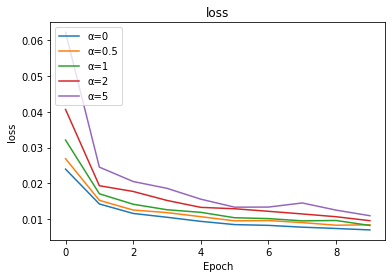

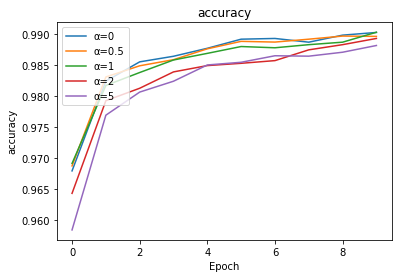

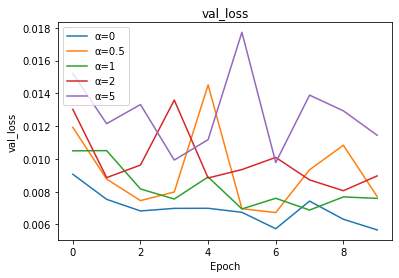

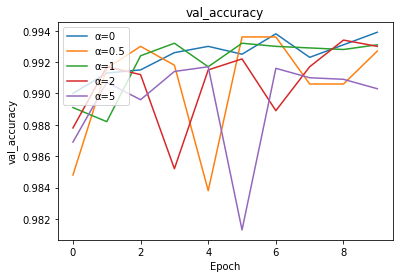

In [11]:
def compare_histories(history, history2, history3, history4, history5, key):
  plt.title(key)
  plt.plot(history.history[key], label="α=0")
  plt.plot(history2.history[key], label="α=0.5")
  plt.plot(history3.history[key], label="α=1")
  plt.plot(history4.history[key], label="α=2")
  plt.plot(history5.history[key], label="α=5")

  plt.xlabel('Epoch')
  plt.ylabel(key)
  plt.legend(loc='upper left')
  plt.show()

for key in history_0.history.keys():
  compare_histories(history_0, history_05, history_1, history_2, history_5, key)